# Assignment 2: Approximating voltage
## Chandinee C
* **Quuestion 1:** For the dataset provided
    * Plot peak demand vs energy consumed.
    * Calculate parameters for best fit regression line for the plot above
    * For a set of 10 cumtomer with energy consumption varing  randomly between 300 and 1500 kWh calculate
        * peak demand for each customer
        * calculate total non-coinsident load
        * calculate total diversified demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Assignment 2 - load profiles.csv')

#printing first few lines of df
print(df.head())


   load_1  load_2  load_3  load_4  load_5  load_6  load_7  load_8  load_9  \
0   1.057   1.010   2.095   1.244   0.679   0.203   0.634   0.254   0.289   
1   1.171   1.260   1.475   1.174   0.384   0.193   0.515   0.214   0.271   
2   0.560   1.257   1.249   0.352   0.617   0.242   0.760   0.289   0.329   
3   0.828   0.921   0.704   1.135   0.599   0.232   0.528   0.201   0.239   
4   0.932   0.724   0.330   0.589   0.400   0.188   0.610   0.263   0.303   

   load_10  load_11  load_12  load_13  load_14  load_15  load_16  
0    0.434    0.486    0.238    0.288    0.307    0.976    2.458  
1    0.818    0.585    0.237    0.283    0.307    1.301    1.666  
2    0.419    0.275    0.332    0.258    0.295    1.346    0.554  
3    0.309    0.219    0.257    1.274    1.394    1.648    2.245  
4    0.320    0.874    0.344    4.020    3.214    1.645    1.548  


### a) Plot peak demand vs energy consumed.

In [2]:
#Creating new dataframe Energy_consumption_df with Energy Consumption and peak demand column
# Assuming each row has time interval of 1 hour for energy consumption to be in unit kWh
Energy_consumption_df = pd.DataFrame({'Energy_consumption_kwh': df.sum(axis=0), 'max_demand_15int_kw': df.max(axis=0)})

#print Energy_consumption_df
print(Energy_consumption_df.head())

        Energy_consumption_kwh  max_demand_15int_kw
load_1               1134.9350                5.485
load_2               1229.7450                6.446
load_3               1319.7540                5.488
load_4               1148.1063                5.370
load_5                867.3480                4.996


In [3]:
Energy_consumption_df.columns=["Energy consumption [$kWh$]", "Maximum demand [$kW$]"]
#print(Energy_consumption_df.columns)

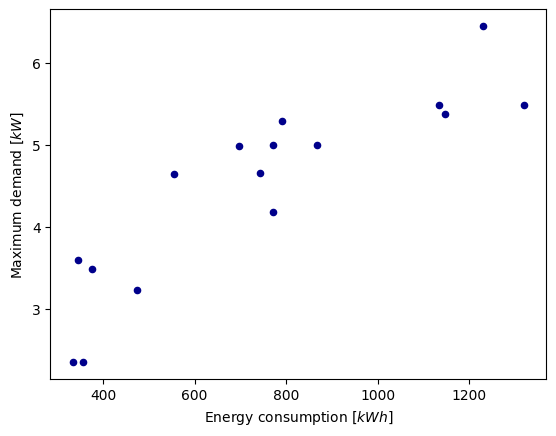

In [4]:
ax1 = Energy_consumption_df.plot.scatter(x='Energy consumption [$kWh$]',
                            y='Maximum demand [$kW$]',
                            c='DarkBlue')

### b) Calculate parameters for best fit regression line for the plot above

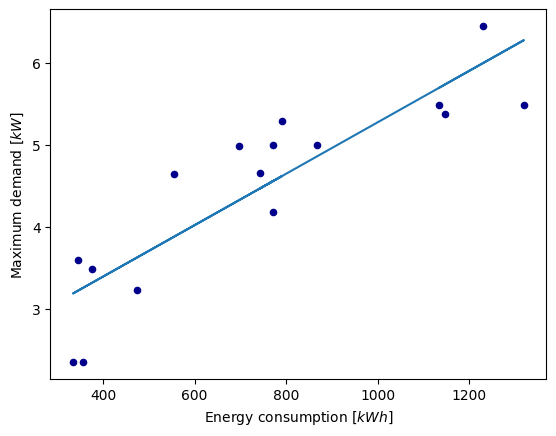

Regression line equation for the given dataset: kW_max = 0.0031309855964555787.kWh + 2.1406151812851504


In [5]:
ax1 = Energy_consumption_df.plot.scatter(x='Energy consumption [$kWh$]',
                            y='Maximum demand [$kW$]',
                            c='DarkBlue')

#regression parameter
m, b = np.polyfit(Energy_consumption_df['Energy consumption [$kWh$]'], Energy_consumption_df['Maximum demand [$kW$]'], 1)

#plot regression line
ax1.plot(Energy_consumption_df['Energy consumption [$kWh$]'], m*Energy_consumption_df['Energy consumption [$kWh$]'] + b)
plt.show()

print(f"Regression line equation for the given dataset: kW_max = {m}.kWh + {b}")

### m = 3.13 Wh 
### b= 2.14 kW 

### c) For a set of 10 cumtomer with energy consumption varing  randomly between 300 and 1500 kWh calculate

In [6]:
import random

#random energy consumption
energy_consumption = [random.randint(300, 1500) for i in range(10)]

#calculate peak demand from the regression equation above
Max_estimated_demand = [i* m + b for i in energy_consumption]
Max_estimated_demand

[5.722462703630333,
 5.982334508136145,
 5.453197942335152,
 4.391793825136712,
 6.614793598620173,
 3.690453051530662,
 6.652365425777639,
 6.395624606868282,
 5.6911528476657764,
 6.3705767220966365]

In [7]:
Max_noncoincidentload = sum(Max_estimated_demand)
print(f"Maximum noncoincident demand: {Max_noncoincidentload} kW")

Maximum noncoincident demand: 56.96475523179751 kW


In [8]:
diversity_factor_at_10 = 2.5 # for 10 customer from the curve
maximum_diversity_demand = Max_noncoincidentload / diversity_factor_at_10
print(f"Maximum diversity demand: {maximum_diversity_demand} kW")

Maximum diversity demand: 22.785902092719006 kW


In [9]:
PFworstcase = 0.9
maximum_diversity_demand_kva = maximum_diversity_demand / PFworstcase
print(f"Maximum diversity demand (kVA): {maximum_diversity_demand_kva} kVA")

Maximum diversity demand (kVA): 25.317668991910004 kVA


* **Quuestion 2:** Using the diversity method
    * Calculate current across line components and transformers
    * Calculate voltage at all electrical nodes 

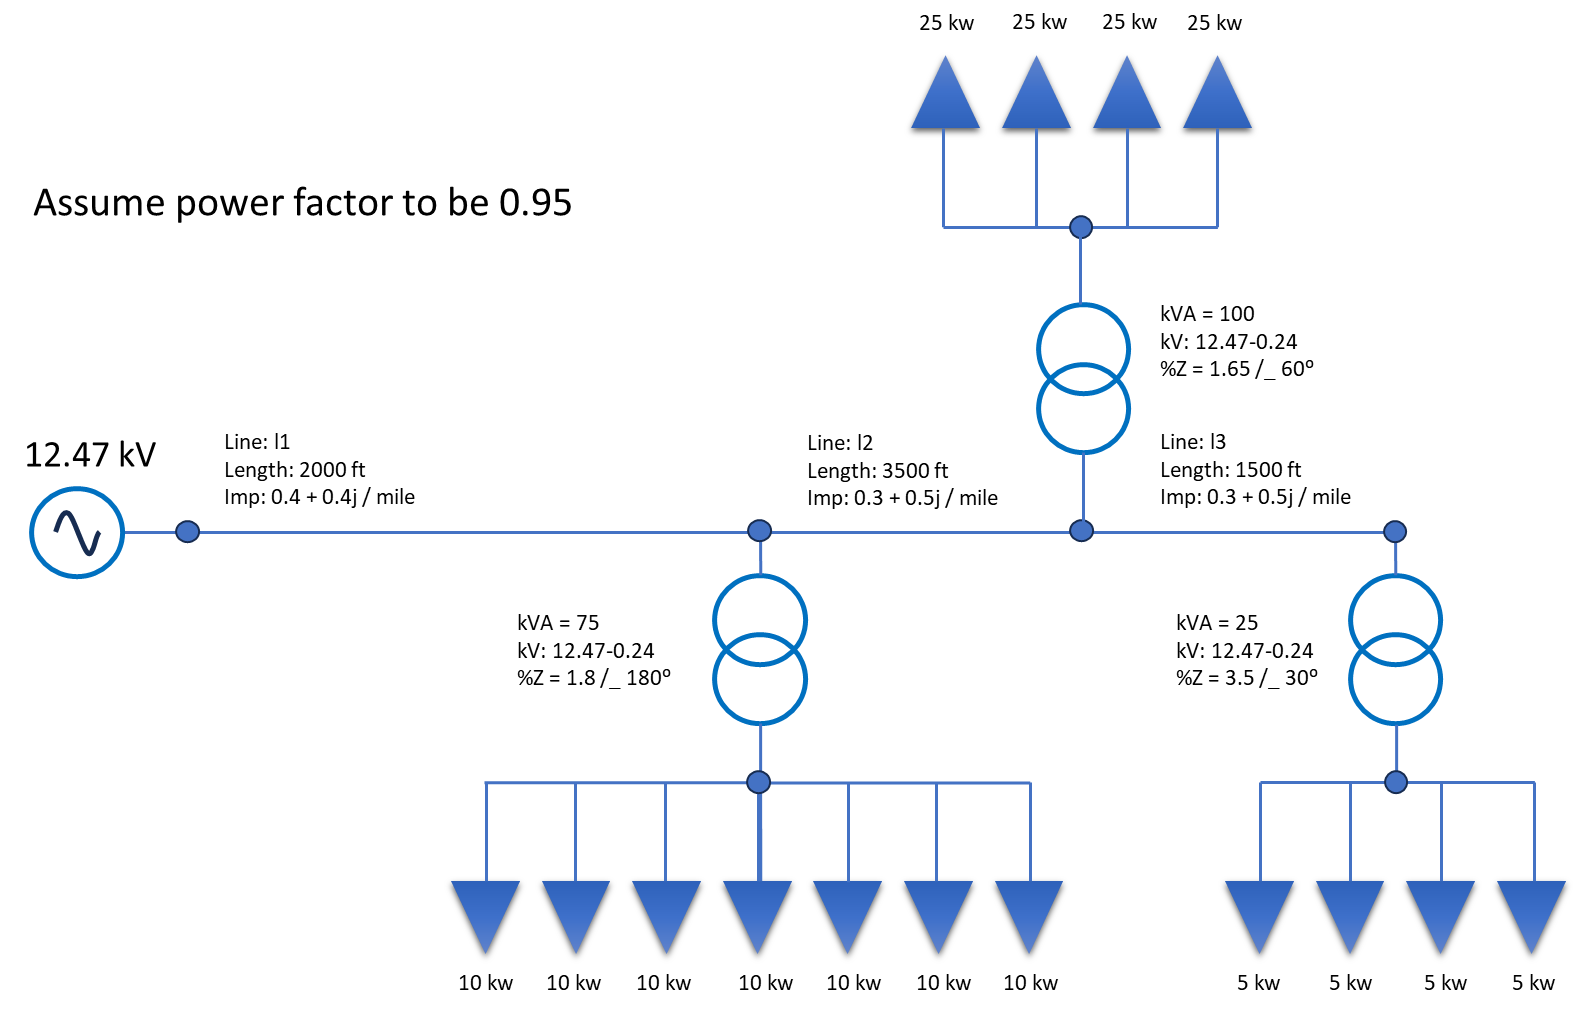

$T1 = 75 kVA, \quad \quad  V = 12.47: 0.24 \;\;kV \quad \quad   Z =1.8 \angle 180 \degree \%$
$T2 = 100 kVA, \quad \quad  V = 12.47: 0.24 \;\;kV \quad \quad   Z =1.65 \angle 60 \degree \% $
$T3 = 25 kVA, \quad \quad  V = 12.47: 0.24 \;\;kV \quad \quad   Z =3.5 \angle 30 \degree \% $
<br><br>

Max Diversified Demand at Nodes <br>
T1 $= (70 + 100 + 20)/2.4 = 79.165 kW$ <br>
T2 $= (100 + 20)/2.1 = 57.14 kW$ <br>
T3 $= (20)/1.7 = 11.76 kW$ <br>

#### Taking diversity factor from the curve

In [10]:
from math import *
import numpy as np

worst_power_factor = 0.95
sin_phi = sin(acos(worst_power_factor))

Line_seg_max_diversified_demand_kW = [79.165 , 57.14, 11.76]

Tr_max_diversified_demand_kVA = [kW + 1j * kW/worst_power_factor * sin_phi  for kW in Line_seg_max_diversified_demand_kW]

print("Transformer diversified demand: ", Tr_max_diversified_demand_kVA)


demand_sum = np.cumsum(Tr_max_diversified_demand_kVA).tolist()
print(demand_sum)
demand_sum.reverse()

Line_seg_max_diversified_demand_kVA = demand_sum
print("Line segment: ", Line_seg_max_diversified_demand_kVA)

Tr_max_diversified_demand_kVA.reverse()

Transformer diversified demand:  [(79.165+26.020277186484705j), (57.14+18.781009769920242j), (11.76+3.8653250769034315j)]
[(79.165+26.020277186484705j), (136.305+44.80128695640495j), (148.065+48.66661203330838j)]
Line segment:  [(148.065+48.66661203330838j), (136.305+44.80128695640495j), (79.165+26.020277186484705j)]


In [11]:
nomKV = 12.47
tr_kVA = [75, 100, 25]
tr_Z_mag = [0.018, 0.0165, 0.035] # divided by 100 to convert from percentage to per unit bases
tr_Z_ang = [180, 60.0, 30.0] 


# Converting to complex values
def cplx(mag, ang):
    return mag*cos(ang * pi / 180) + 1j * mag * sin(ang * pi / 180)

tr_pu_Z_cplx = [
    cplx(tr_Z_mag[0], tr_Z_ang[0]),
    cplx(tr_Z_mag[1], tr_Z_ang[1]),
    cplx(tr_Z_mag[2], tr_Z_ang[2])
] 

# Converting the negative impedence to positive impedence
#print(tr_pu_Z_cplx[0])
tr_pu_Z_cplx[0]=np.real(tr_pu_Z_cplx[0])*(-1) + np.imag(tr_pu_Z_cplx[0])*1j
tr_pu_Z_cplx

[(0.018+2.2043642384652355e-18j),
 (0.008250000000000002+0.014289419162443237j),
 (0.030310889132455356+0.017499999999999998j)]

In [12]:
tr_impedance_bases =  [0, 0, 0] 
tr_impedances_ohms = [0, 0, 0]
print(f"Transformer impedances")

for i in range(3):
    

    # Zbase = (kv)^2 / (KVA)
    tr_impedance_bases[i] = nomKV ** 2 * 1000 / tr_kVA[i]

    #Z_actual = Z_pu * Z_base
    tr_impedances_ohms[i] = tr_pu_Z_cplx[i]  * tr_impedance_bases[i]
    print(f"T{i+1} impedance: {tr_impedances_ohms[i]}")
    
print(f"")


Transformer impedances
T1 impedance: (37.320216+4.570408306788784e-15j)
T2 impedance: (12.828824250000006+22.220175402371698j)
T3 impedance: (188.5348215958811+108.85063000000001j)



In [13]:
lineseg_impedence= [0,0,0]
length_line_ft = [2000, 3500, 1500]
line_impedence_per_mile = [0.4 + 1j*0.4, 0.3 + 1j* 0.5,  0.3 + 1j* 0.5 ]

#Impendence per mile * length of wire
for i in range(3):
    lineseg_impedence[i] = line_impedence_per_mile[i] * length_line_ft[i] / 5280  # converting length to miles
    print(f"N{i+1}-N{i+2}  impedance: {lineseg_impedence[i]}")
print(f"")

N1-N2  impedance: (0.15151515151515152+0.15151515151515152j)
N2-N3  impedance: (0.19886363636363635+0.3314393939393939j)
N3-N4  impedance: (0.08522727272727272+0.14204545454545456j)



In [14]:
# Given S = VI*  
I12 = (Line_seg_max_diversified_demand_kVA[0] / nomKV).conjugate()
print(f"I12: {I12}, abs: {abs(I12)}")

# V = Z.I
#V2 = V1 – (Z12 ⋅ I12)
V2 = nomKV * 1000 - (lineseg_impedence[0] * I12)
print(f"V2: {V2}, abs: {abs(V2)}")

# Calculating transformer current
IT1 = (Tr_max_diversified_demand_kVA[0] / (V2 / 1000)).conjugate()
print(f"IT1: {IT1}, abs: {abs(IT1)}")


# VT1 = V2 – ZT2 ⋅ IT1 
VT1_hv = V2 - tr_impedances_ohms[0] *  IT1

#T1 low-side voltage 
print(f"VT1_hv: {VT1_hv}, abs: {abs(VT1_hv)}")
tr_turn_ratio = 12.47/0.24
VT1_lv = VT1_hv / tr_turn_ratio
print(f"VT1_lv: {VT1_lv}, abs: {abs(VT1_lv)}")

I12: (11.873696872493985-3.902695431700752j), abs: 12.498628286835773
V2: (12467.609637529667-1.207727491029278j), abs: 12467.60969602547
IT1: (0.9432141204732906-0.3101207316347094j), abs: 0.9928885865241127
VT1_hv: (12432.408682819354+10.366045199656106j), abs: 12432.413004382342
VT1_lv: (239.27651033493544+0.1995068843558513j), abs: 239.2765935085615


In [15]:
# KCL 
I23 = I12 - IT1

print(f"I23: {I23}, abs: {abs(I23)}")

#V3 = V2 – Z2 ⋅ I23
V3 = V2 - lineseg_impedence[1] * I23
print(f"V3: {V3}, abs: {abs(V3)}")


# Calculating transformer current
IT2 = (Tr_max_diversified_demand_kVA[1] / (V3 / 1000)).conjugate()
print(f"IT2: {IT2}, abs: {abs(IT2)}")

# VT2 = V3 – ZT2 ⋅ IT2 
VT2_hv = V3 - tr_impedances_ohms[1] *  IT2

print(f"VT2_hv: {VT2_hv}, abs: {abs(VT2_hv)}")
tr_turn_ratio = 12.47/0.24
VT2_lv = VT2_hv / tr_turn_ratio
print(f"VT2_lv: {VT2_lv}, abs: {abs(VT2_lv)}")

I23: (10.930482752020694-3.592574700066043j), abs: 11.50573970537212
V3: (12464.245241201119-4.116087601060881j), abs: 12464.245920832189
IT2: (4.58381479030127-1.5083044973313207j), abs: 4.825592242249087
VT2_hv: (12371.925496370905-86.61948294179263j), abs: 12372.228716871408
VT2_lv: (238.11243938484498-1.6670951007241563j), abs: 238.11827522446976


In [16]:

I34 = I23 - IT2

print(f"I34: {I34}, abs: {abs(I34)}")

#V4 = V3 – Z3 ⋅ I23
V4 = V3 - lineseg_impedence[2] * I34
print(f"V4: {V4}, abs: {abs(V4)}")


# Calculating transformer current
IT3 = (Tr_max_diversified_demand_kVA[2] / (V4 / 1000)).conjugate()
print(f"IT1: {IT3}, abs: {abs(IT3)}")

# VT3 = V4 – ZT3 ⋅ IT3 
VT3_hv = V4 - tr_impedances_ohms[2] *  IT3

print(f"VT2_hv: {VT3_hv}, abs: {abs(VT3_hv)}")
tr_turn_ratio = 12.47/0.24
VT3_lv = VT3_hv / tr_turn_ratio
print(f"VT3_lv: {VT3_lv}, abs: {abs(VT3_lv)}")

I34: (6.346667961719424-2.0842702027347224j), abs: 6.680147939553707
V4: (12463.408270891494-4.83996627152659j), abs: 12463.4092106534
IT1: (6.350982153690722-2.090199980589759j), abs: 6.686098284900953
VT2_hv: (11038.507398873606-302.07289437931416j), abs: 11042.63979438368
VT3_lv: (212.4492201868216-5.813752578270681j), abs: 212.52875305950948
